### Intro to SVM

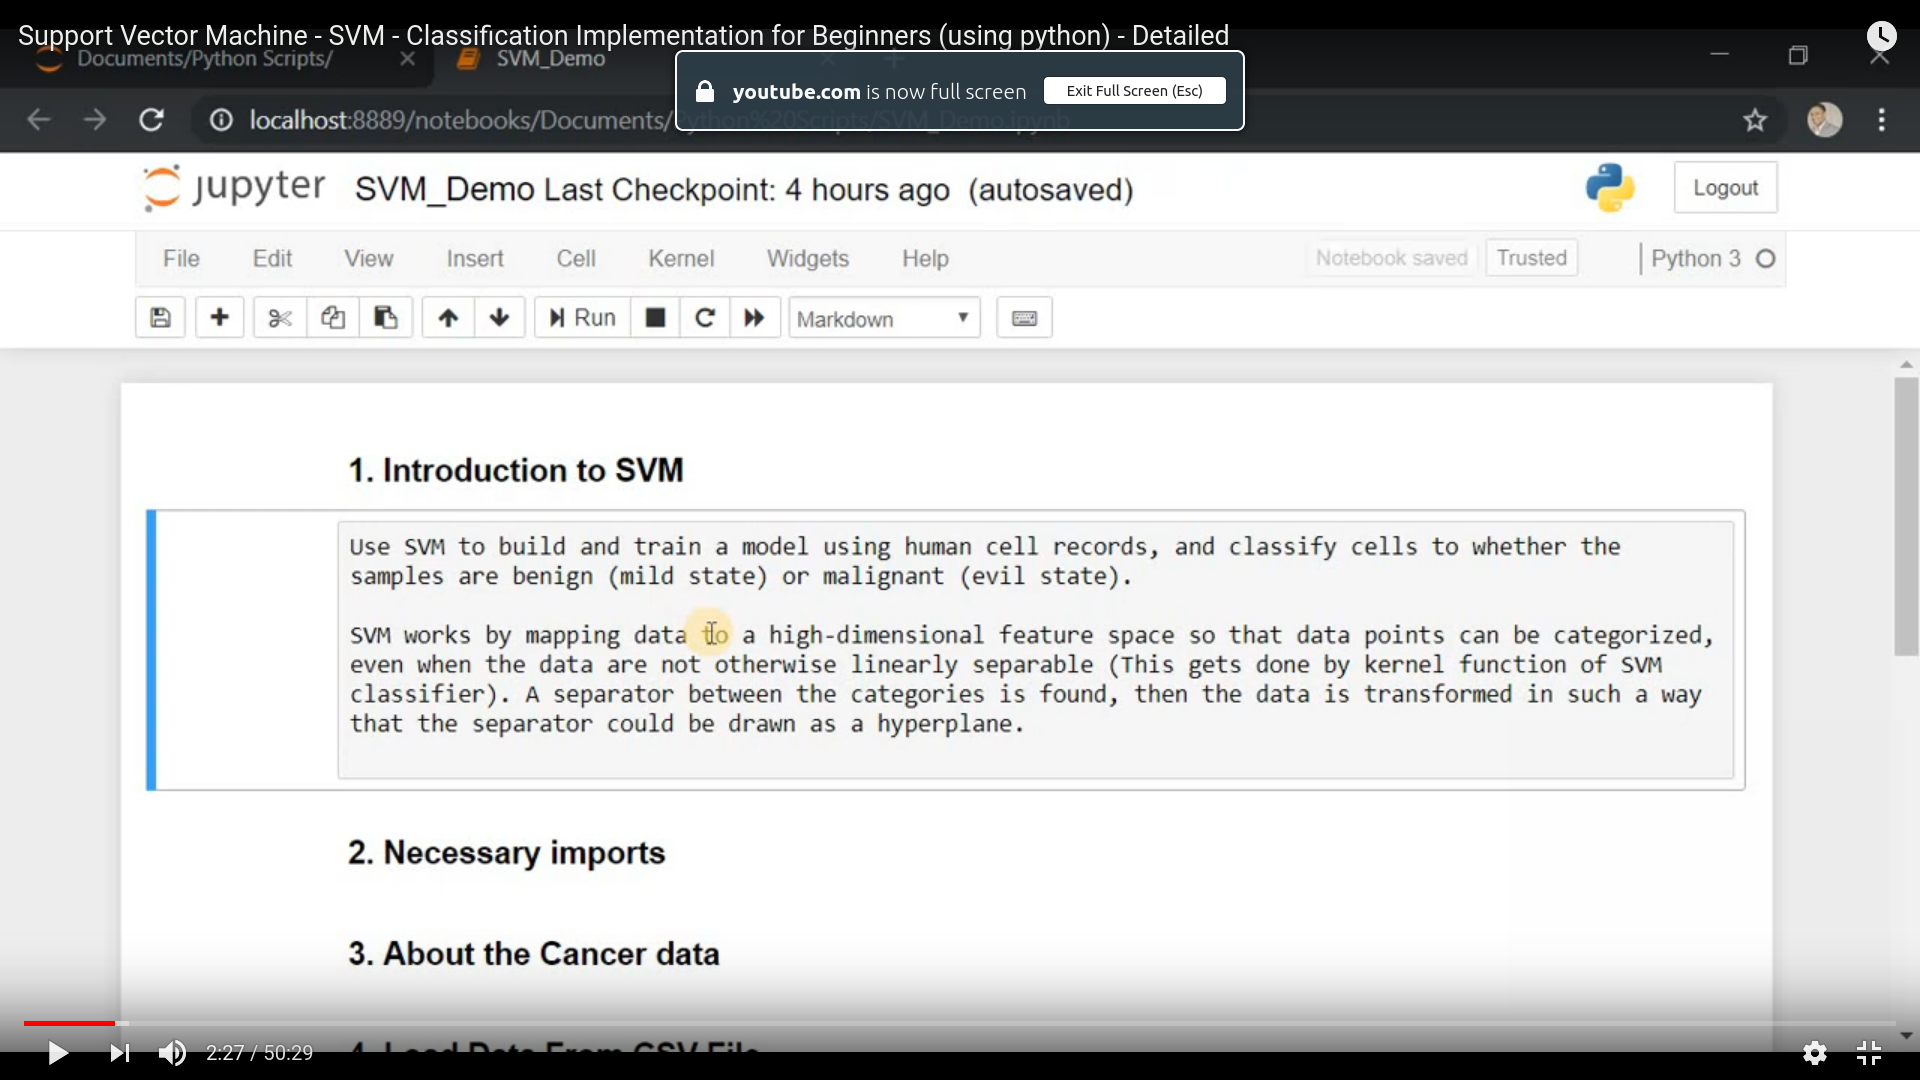

In [81]:
from IPython.display import Image
Image('Intro_to_SVM.png')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
cell=pd.read_csv('cell_samples.csv')

In [7]:
cell
cell['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [15]:
malignant_df=cell[cell['Class']==4][0:200]
benign_df=cell[cell['Class']==2][0:200]

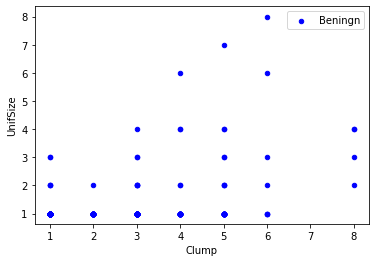

In [38]:
benign=benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='Beningn')

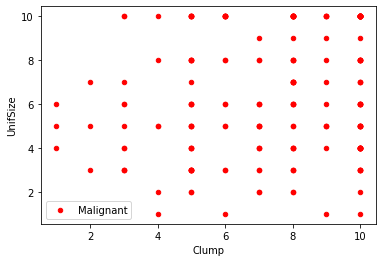

In [39]:
malignant=malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='Malignant')

In [13]:
help(malignant_df.plot) ## Focus on Parameters in the result of this.

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'p

In [50]:
## Since we want both in same graph
##  we have ax which tells on which axis you want to plot the data

malignant=malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='Malignant',ax=benign)

In [57]:
cell.dtypes

## BareNuc is object type so we cannot apply Numeric operation so we need to convert it.
cell=cell[pd.to_numeric(cell['BareNuc'],errors='coerce').notnull()]
cell['BareNuc']=cell['BareNuc'].astype('int')
cell.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [61]:
cell.columns

features=cell[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]


## Independent Variables
x=np.asarray(features)

## Dependent Variables
y=np.asarray(cell['Class'])

In [ ]:
### Divide into test and train

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [63]:
x_train.shape

(546, 9)

In [13]:
help(malignant_df.plot) ## Focus on Parameters in the result of this.

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'p

In [13]:
help(malignant_df.plot) ## Focus on Parameters in the result of this.

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'p

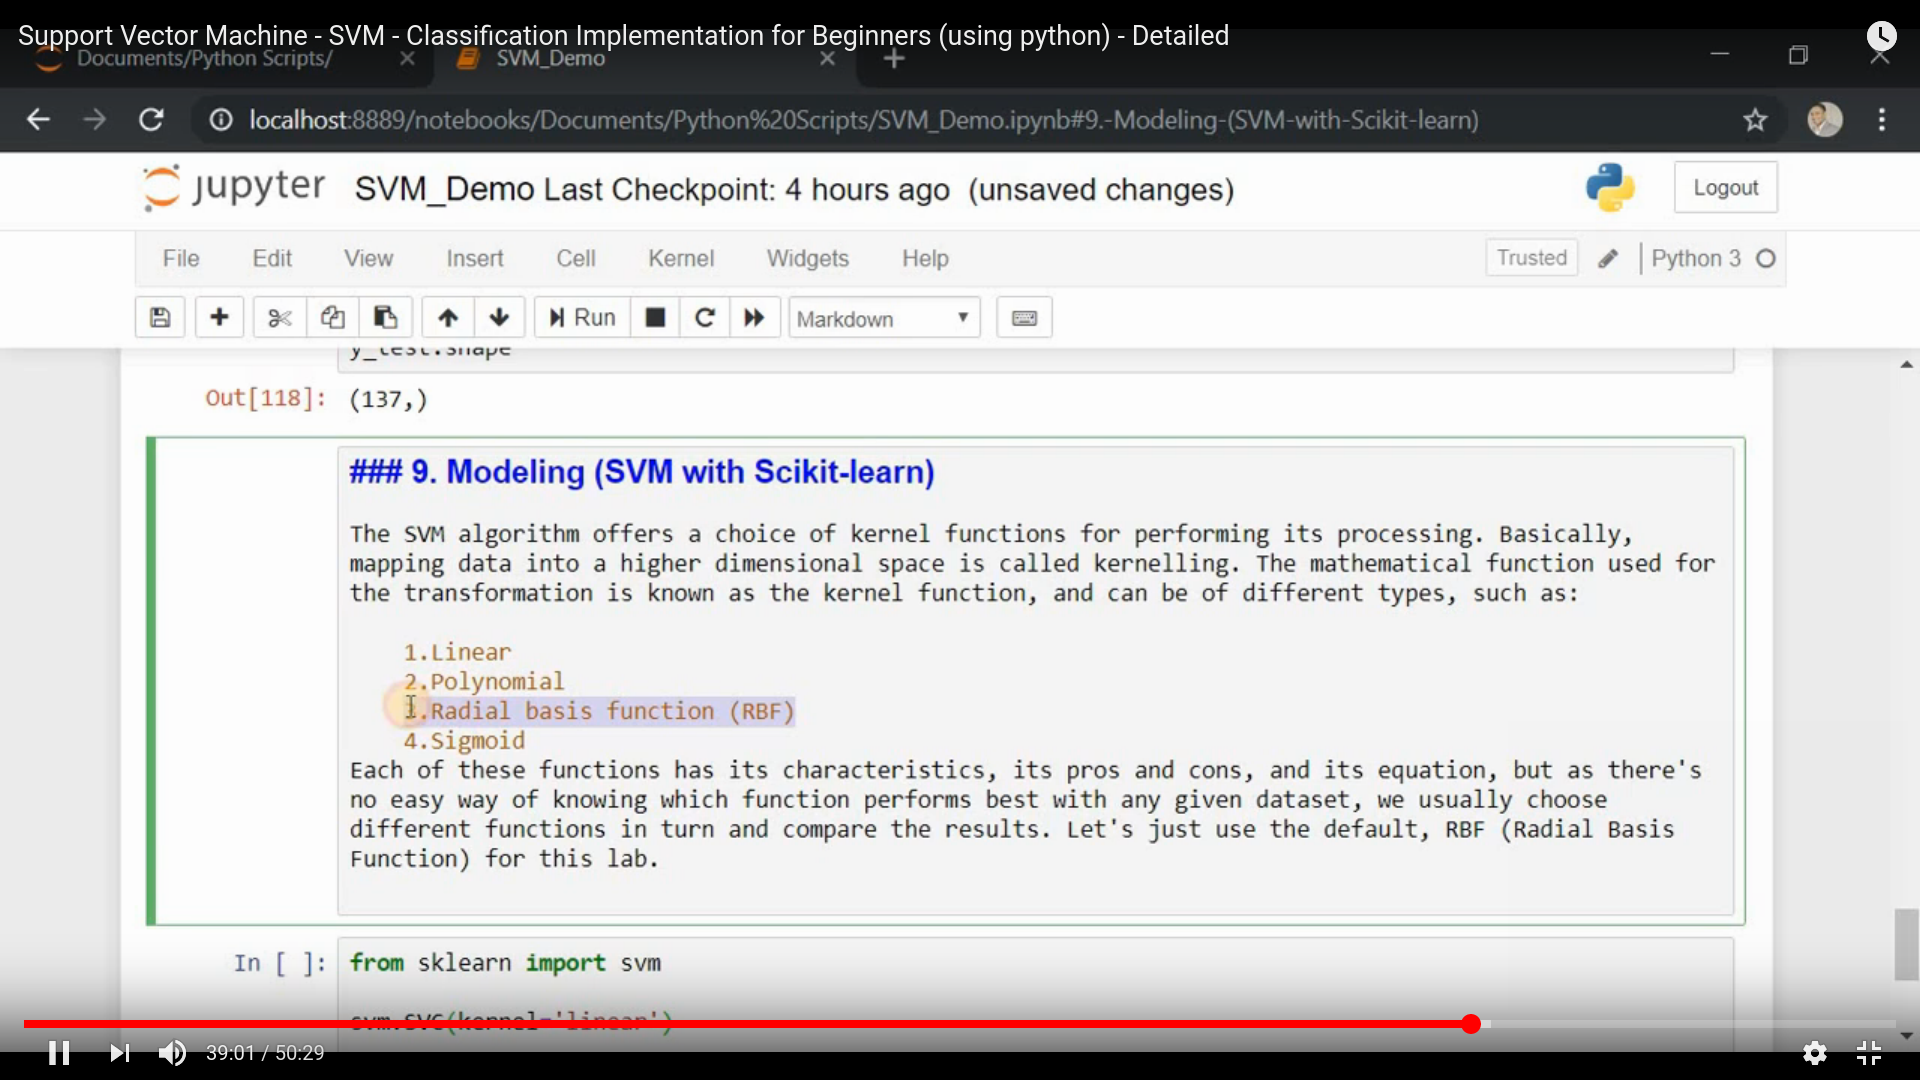

In [82]:
Image('SVM_Kernel.png')

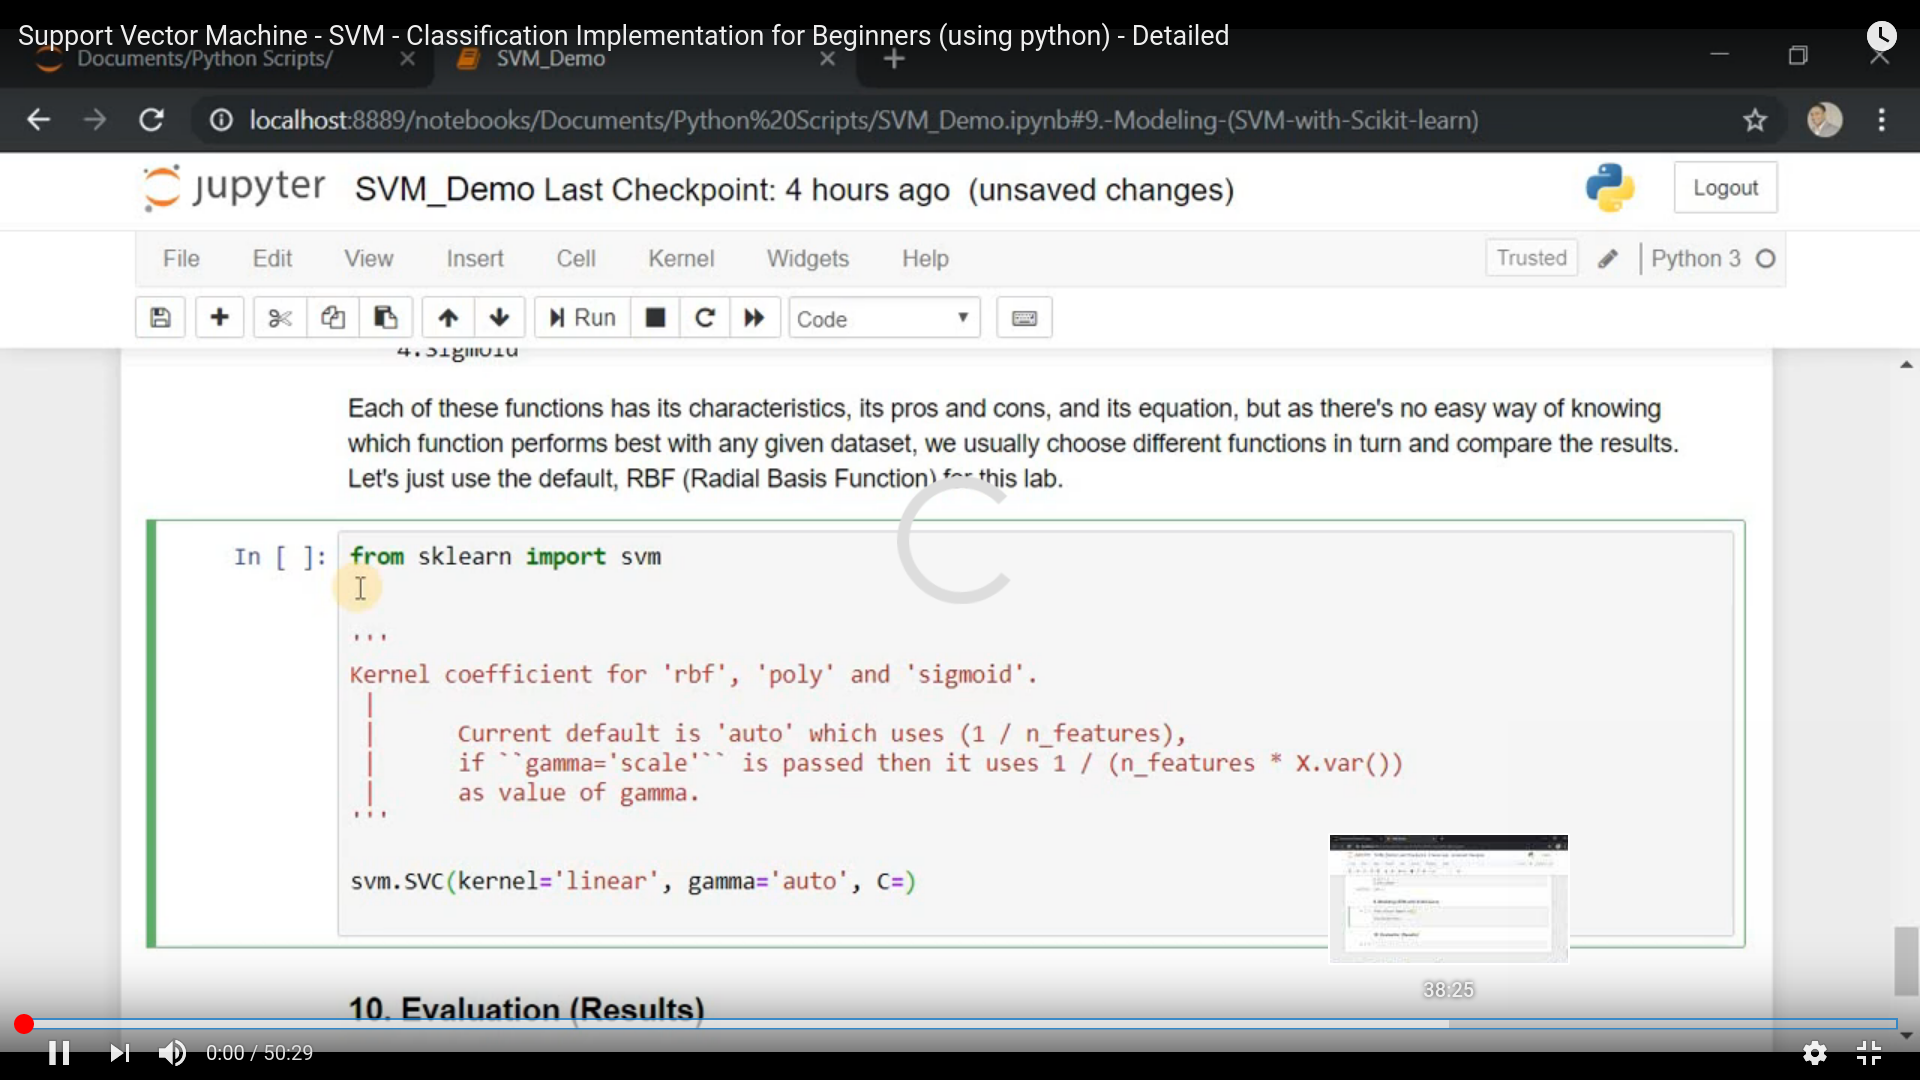

In [83]:
Image('SVM_GAMMA.png')

In [66]:
from sklearn import svm
## SVC is Support vector classifier 

classifier=svm.SVC(kernel='linear',gamma='auto', C=2)

In [69]:
classifier.fit(x_train,y_train)

In [70]:
y_predict=classifier.predict(x_test)

In [71]:
y_predict

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4])

In [74]:
## NOw we need to compare this y_predict with y_test(Actual Y)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))


## for class-2 we have precision of 100% and class-4 precision of 90%

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [76]:
img='Screenshot from 2020-06-04 00-46-05.png'

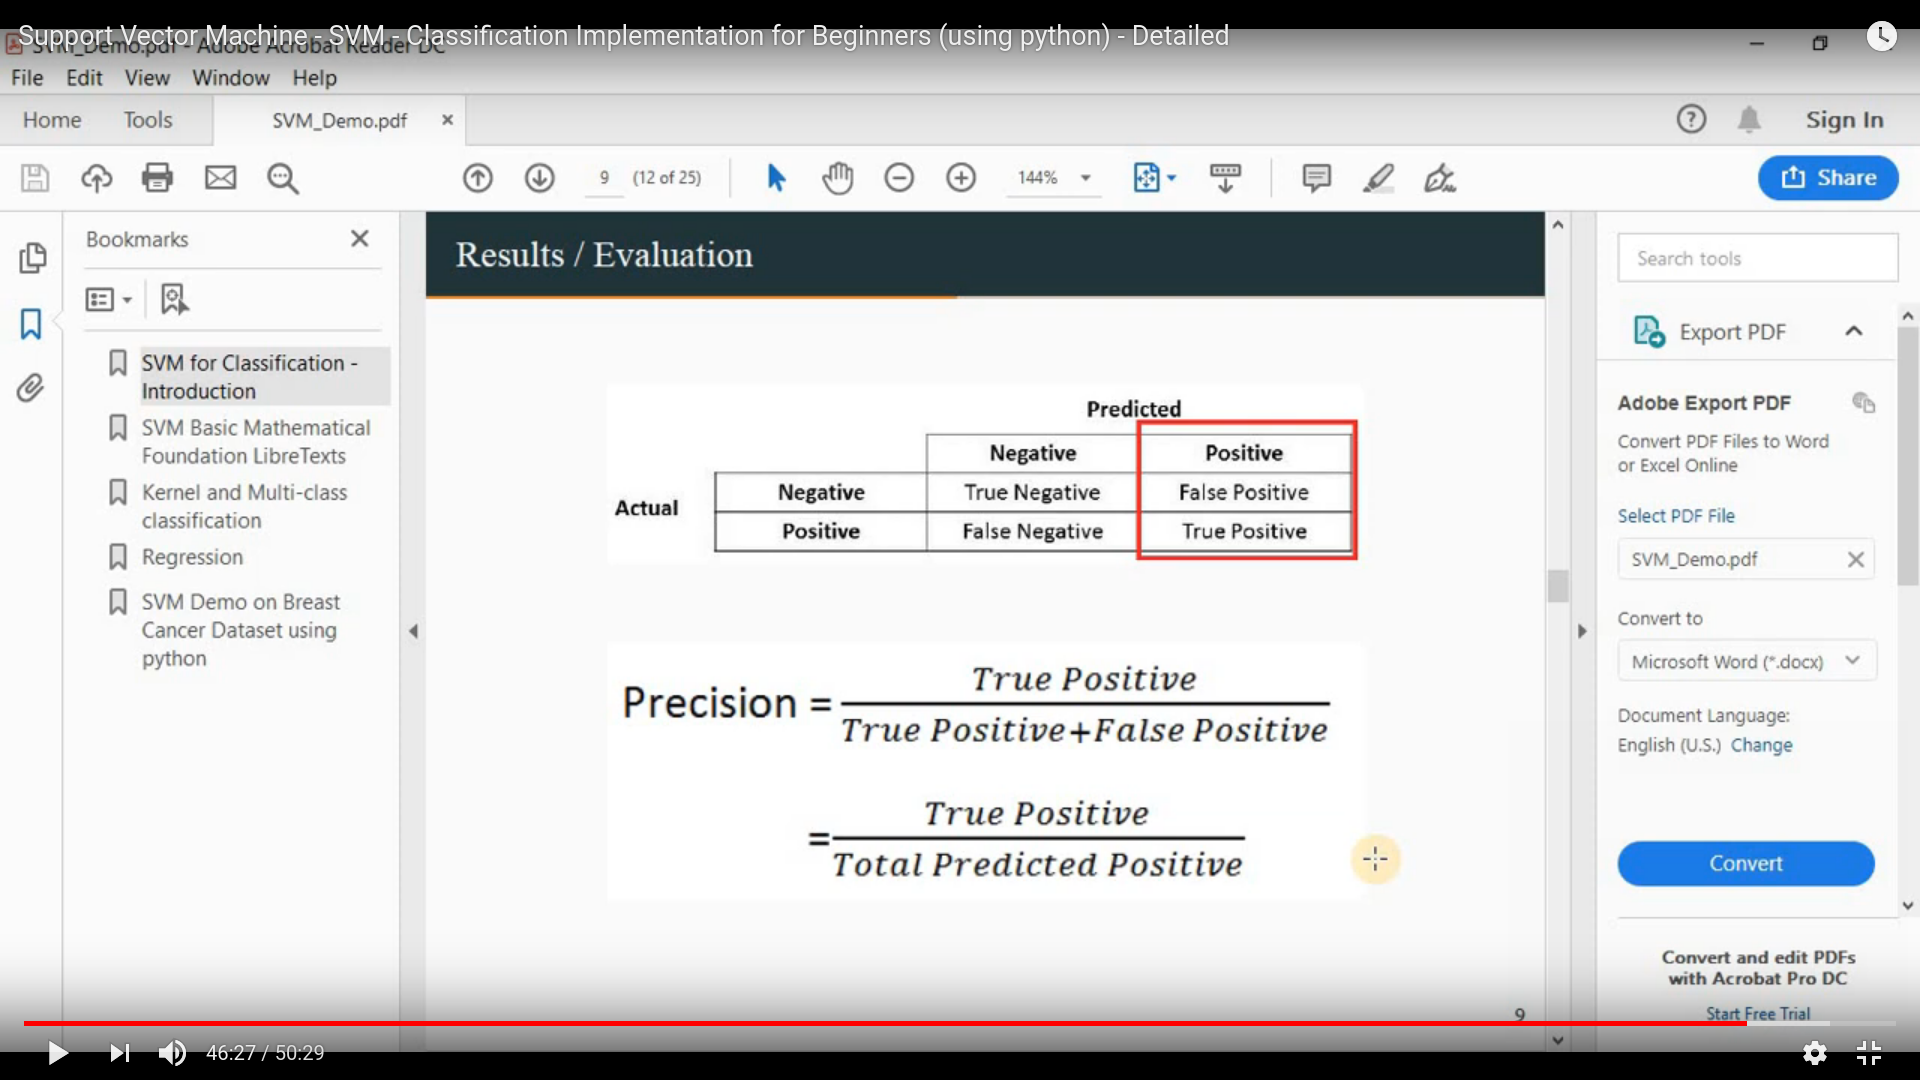

In [79]:
from IPython.display import Image
Image('Screenshot from 2020-06-04 00-46-05.png')

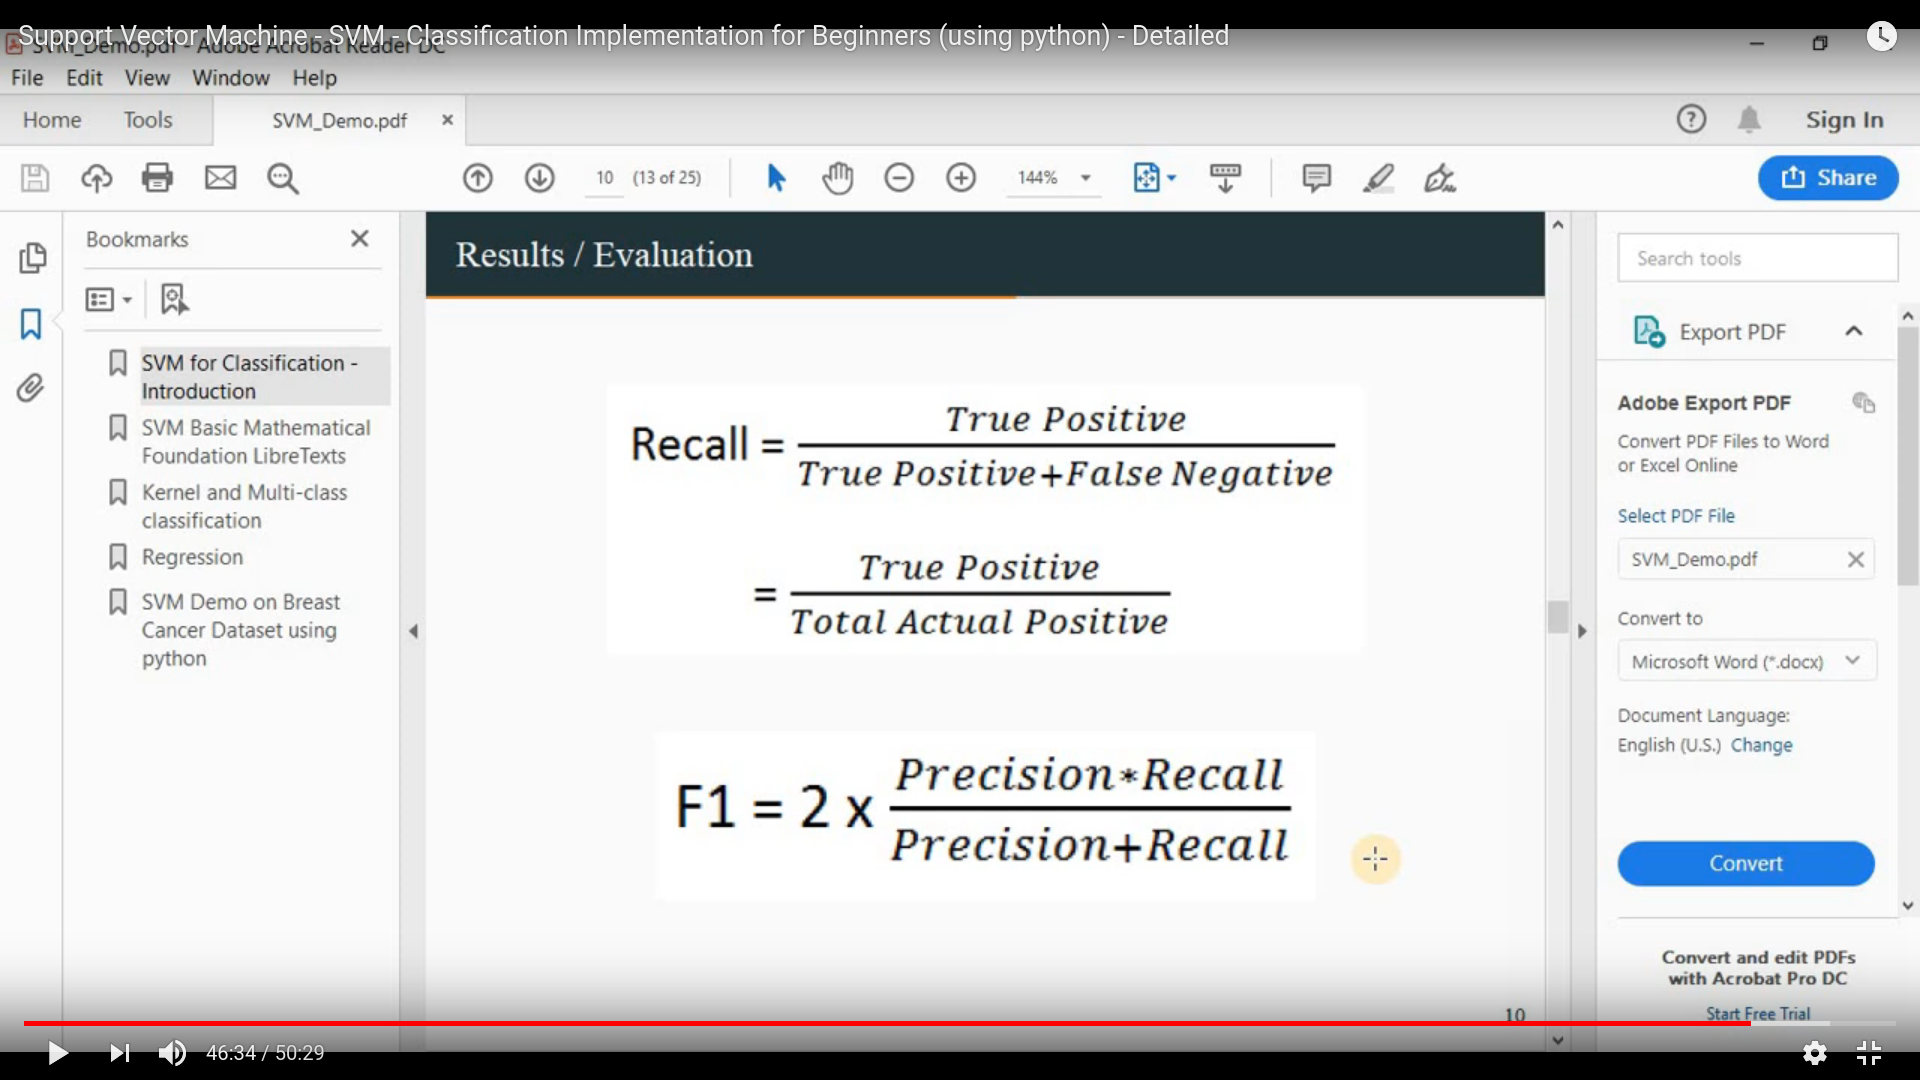

In [80]:
from IPython.display import Image
Image('Screenshot from 2020-06-04 00-46-08.png')